In [7]:
%%HTML
<style type="text/css">
    h1{
        color:red;
    } 
    h2{
        color:orange;
    }
    h3{
        color:tomato;
    } 
    h4{
        color:purple;
    }
    h5{
        color:green;
    }
    table{
        border-collapse:collapse; 
    }
    th{
        color:blueviolet;
        background-color:orange;
    }
    td:hover{
        background-color:blueviolet;
        scale:1.2;
        transiction:1s all liner;
        color:white;
        
    }
</style>

# pytorch张量

## pytorch张量与数据类型

Tensor(张量)  
- 构造一个随机初始化的矩阵:torch.rand
- 全0矩阵:torch.zeros
- 全1矩阵:torch.ones
- 直接从数据构造张量:torch.tensor

### 创建张量

In [1]:
import torch

#### 创建指定符合正态分布的张量

In [2]:
X = torch.rand(2,3) #创建两行三列的矩阵，正态分布的随机数 

In [3]:
X

tensor([[0.9080, 0.5990, 0.9454],
        [0.8307, 0.9805, 0.5999]])

#### 创建指定维数0张量 

In [4]:
X1 = torch.zeros(3,4) #生成3行4列的数组  
X1 

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

#### 创建指定维数的1张量

In [5]:
X2 = torch.ones(4,4)
X2

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

.size可以轻松的返回指定的维度的大小,但是用shape的话就需要切片了

In [6]:
X2.size() 

torch.Size([4, 4])

In [8]:
X2.shape

torch.Size([4, 4])

In [9]:
X2.size(0)

4

In [11]:
X2.shape[0] 

4

### tensor的基本数据类型

- 32位浮点型 torch.float32
- 64位浮点型 torch.float64
- 32位整型 torch.int32
- 16位整形 torch.int16
- 64位整形 torch.int64 

### 数据类型的转换 

#### 从列表创建一个tensor

##### 创建的时候可以指定dtype

In [12]:
x0 = torch.tensor([6,2],dtype=torch.float32)
x0

tensor([6., 2.])

In [13]:
x0.type() 

'torch.FloatTensor'

##### 数据类型的转化

In [ ]:
x0.type(torch.int64)

也可以在创建的时候就指定

In [14]:
x1 = torch.ones((3,3),dtype = torch.int32)
x1

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)

#### tensor与ndarry类型的转换

In [2]:
import numpy as np 

In [3]:
a = np.random.randn(2,3)

In [4]:
a

array([[ 1.2961909 , -0.10560035, -0.49528738],
       [ 1.19952738, -0.02183764, -1.766809  ]])

#### 从numpy创建张量（将ndarry转换成tensor） 

In [5]:
x2 = torch.from_numpy(a)
x2

tensor([[ 1.2962, -0.1056, -0.4953],
        [ 1.1995, -0.0218, -1.7668]], dtype=torch.float64)

#### 将tensor转换成ndarry

In [6]:
n = x2.numpy()
n

array([[ 1.2961909 , -0.10560035, -0.49528738],
       [ 1.19952738, -0.02183764, -1.766809  ]])

## 张量运算与形状变换

### 张量的运算

#### 创建张量进行计算

In [8]:
x_0 = torch.rand(2,3)
x_1 = torch.rand(2,3)
x_0,x_1

(tensor([[0.3709, 0.1917, 0.1294],
         [0.2383, 0.3073, 0.2225]]),
 tensor([[0.0296, 0.3935, 0.6238],
         [0.9181, 0.2736, 0.2442]]))

##### 相加

In [9]:
x_0+x_1

tensor([[0.4005, 0.5851, 0.7532],
        [1.1563, 0.5809, 0.4667]])

##### 用魔术命令来对各个元素增加值

In [10]:
x_0+1

tensor([[1.3709, 1.1917, 1.1294],
        [1.2383, 1.3073, 1.2225]])

##### 或者用.add()

In [11]:
x_0.add(-1) 

tensor([[-0.6291, -0.8083, -0.8706],
        [-0.7617, -0.6927, -0.7775]])

##### 应该注意的是这些操作并没有对原来的张量进行改变，如果要让改变以不赋值给新变量(如$x_{new}=x_0.add(-1)$)而就地改变的话,需要用下划线的.add_()

In [12]:
x_0.add_(1)

tensor([[1.3709, 1.1917, 1.1294],
        [1.2383, 1.3073, 1.2225]])

In [13]:
x_0

tensor([[1.3709, 1.1917, 1.1294],
        [1.2383, 1.3073, 1.2225]])

可以看到确实对原来的x_0张量作了运算且其确实发生了改变

### 转变张量的形状

我们这里要用到`.view()`,其相当于是numpy中的`.reshape()`

In [14]:
x_1

tensor([[0.0296, 0.3935, 0.6238],
        [0.9181, 0.2736, 0.2442]])

##### 将其转换为三行两列 

In [15]:
x_1.view(3,2)

tensor([[0.0296, 0.3935],
        [0.6238, 0.9181],
        [0.2736, 0.2442]])

In [16]:
x_1.view(-1,1)

tensor([[0.0296],
        [0.3935],
        [0.6238],
        [0.9181],
        [0.2736],
        [0.2442]])

```python
#解释view(-1,1)
x_1.view(-1,1)  
```
##### -1表示第一个维度自动计算,第二个维度为1,总共是3*2=6个元素，如果第二维度是1,那么第一个维度就是6/1 = 6,自然就变成了6行1列


#### 和numpy中类似的一些运算操作

In [17]:
x_1.sum()

tensor(2.4829)

In [18]:
x_1.mean()

tensor(0.4138)

注意这样返回的也是张量,但是如果我们想要获取标量值的话需要做出如下操作

In [19]:
sum_v = x_1.sum()

In [20]:
sum_v

tensor(2.4829)

In [23]:
type(sum_v)

torch.Tensor

##### 利用.item() 获取标量值 

In [21]:
sum_v.item() 

2.482855796813965

In [22]:
type(sum_v.item()) 

float

## 张量微分运算 

### 张量的自动微分

将`torch.Tensor()`属性`requires_grad`设置为`True`  
pytorch将开始跟踪对此张量的所有操作  
完成计算之后,可以调用`.backward()`并自动计算所有梯度 
该张量的梯度将累加到`.grad`属性中

In [24]:
t0 = torch.ones(2,2,requires_grad=True,dtype='int32') 

In [25]:
t0 

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [26]:
t0.requires_grad

True

可以看到这个requires_grad属性已经是True了

In [33]:
t1 = t0 + 2 
t1 

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

可以看到其中grad_fn

In [34]:
t1.grad_fn

In [35]:
t2 = t1*t1+3

In [36]:
t2 

tensor([[12., 12.],
        [12., 12.]], grad_fn=<AddBackward0>)

In [37]:
t2.grad_fn

In [38]:
vec_1 = t2.mean() 
vec_1

tensor(12., grad_fn=<MeanBackward0>)

##### 利用pytorch框架自动计算微分(梯度)

微分的结果就是vec_1,然后我们得到的就是$vec\_1 = f(x)$ 
其中的$f(x)$就是我们刚才对t0所做的一系列的运算操作  
我们要调用`.backward()`做的的就是$\frac{df(x)}{dx}$  
然后结果会存在`.grad`属性中

In [39]:
vec_1.backward()

In [44]:
t0.grad

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])

$\frac{(t_0+2)\times(t_0+2)+3}{4}$  
然后对$t_0$求导    
$$\frac{(t_0+2)^2+3}{4t_0}$$求导之后带入t0的值


In [45]:
t0.data

tensor([[1., 1.],
        [1., 1.]])

如果不需要张量自动微分那就需要用`torch.no_grad()`来做上下文管理  
```python
with torch.no_grad(): 
    #计算过程
```
像这样就不会进行跟踪

In [50]:
with torch.no_grad(): 
    print((t0**2).requires_grad) 

False


In [54]:
torch.tensor.requires_grad??

Object `torch.tensor.requires_grad` not found.


In [59]:
demo1 = torch.ones(2,2,requires_grad = True)
demo1

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [60]:
demo2 = demo1+2
demo2

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [62]:
demo2.grad_fn

In [68]:
demo2.backward() 

RuntimeError: grad can be implicitly created only for scalar outputs

这里提示需要注意，再次提醒，只有标量才可以进行.backward()

In [65]:
demo3 = demo2.mean() 

In [66]:
demo3.backward() 

In [67]:
demo1.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

##### 也可以利用`.detach()`获取不包含梯度的值

In [69]:
demo4 = demo1.detach() 

In [70]:
demo4

tensor([[1., 1.],
        [1., 1.]])

## 入门实例的分解写法

In [1]:
import torch
from torch import nn 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
data = pd.read_csv('./dataset/Income1.csv')

In [3]:
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [4]:
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

In [5]:
model = nn.Linear(1,1)
loss_fn = nn.MSELoss() 
opt = torch.optim.SGD(model.parameters(),lr=0.0001)

### 模型的分解写法

因为是线性模型，所以需要初始化$w$和$b$,  
因为是一元线性回归，所以w生成的正态分布的随机数的维度是1

In [8]:
torch.randn??

Docstring:
randn(*size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) -> Tensor


Returns a tensor filled with random numbers from a normal distribution
with mean `0` and variance `1` (also called the standard normal
distribution).

.. math::
    \text{out}_{i} \sim \mathcal{N}(0, 1)

For complex dtypes, the tensor is i.i.d. sampled from a `complex normal distribution`_ with zero mean and
unit variance as

.. math::
    \text{out}_{i} \sim \mathcal{CN}(0, 1)

This is equivalent to separately sampling the real :math:`(\operatorname{Re})` and imaginary
:math:`(\operatorname{Im})` part of :math:`\text{out}_i` as

.. math::
    \operatorname{Re}(\text{out}_{i}) \sim \mathcal{N}(0, \frac{1}{2}),\quad
    \operatorname{Im}(\text{out}_{i}) \sim \mathcal{N}(0, \frac{1}{2})

The shape of the tensor is defined by the variable argument :attr:`size`.


Args:
    size (int...): a sequence of integers defining the shape of the outp

In [6]:
w = torch.randn(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True) #将偏置(截距)初始化为0  

$Output = w\times Input+b$

In [7]:
learning_rate = 0.0001

In [8]:
for epoch in range(1000): 
    for x,y in zip(X,Y): 
        y_pread = torch.matmul(w,x)+b #使用矩阵乘法实现w*x+b
        loss = (y-y_pread).pow(2).mean() #均方误差  
        if not w.grad is None: #如果权重的梯度不是None,那就将w的梯度都置为0
            w.grad.data.zero_() #就地改变,将其置为0
        if not b.grad is None: #如果偏置的梯度不是None,那就将b的梯度都置为0
            b.grad.data.zero_() #就地改变,将其置为0
        loss.backward() #反向传播 
        # 下面的就是优化参数,opt.step()的拆分的写法，权重*梯度*学习率，偏置*梯度*学习率 
        with torch.no_grad(): #接下来的优化是不跟踪变量的梯度的，所以要引入管理 
            w.data -= w.grad.data*learning_rate 
            b.data -= b.grad.data*learning_rate 
            #改变的效果就是降低loss
            
print('训练完毕')

训练完毕


In [9]:
w

tensor([3.9330], requires_grad=True)

In [10]:
b 

tensor([-9.1388], requires_grad=True)

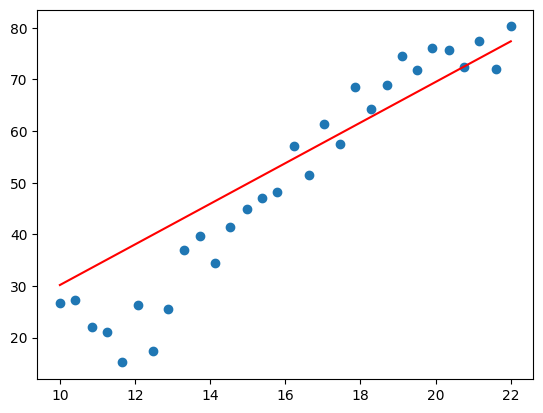

In [11]:
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),(w*X+b).data.numpy(),c='red')